# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 4 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдите в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выберите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [5]:
### BEGIN YOUR CODE

Student_ID = 1

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [6]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'US Air Carrier market in 2019' доступен по следующей ссылке: https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 2


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [11]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
!unzip aircarrier_market_us_2019.zip


### END YOUR CODE

--2025-09-01 07:39:32--  https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10159563 (9.7M) [application/zip]
Saving to: ‘aircarrier_market_us_2019.zip’

aircarrier_market_u 100%[===================>]   9.69M  --.-KB/s    in 0.1s    

2025-09-01 07:39:32 (94.9 MB/s) - ‘aircarrier_market_us_2019.zip’ saved [10159563/10159563]

Archive:  aircarrier_market_us_2019.zip
  inflating: aircarrier_market_us_2019.csv  


##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [12]:
import pandas as pd

# Загружаем CSV в DataFrame
df = pd.read_csv("aircarrier_market_us_2019.csv")

# Приводим имена столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Смотрим первые строки
df.head()


,passengers,freight,mail,distance,unique_carrier,airline_id,unique_carrier_name,unique_carrier_entity,region,carrier,...,dest_state_nm,dest_country,dest_country_name,dest_wac,year,quarter,month,distance_group,class,data_source
0,0.0,53185.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,Texas,US,United States,74,2019,1,3,17,G,IF
1,0.0,9002.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,New York,US,United States,22,2019,1,3,14,G,IF
2,0.0,2220750.0,0.0,7247.0,EK,20392,Emirates,9678A,I,EK,...,Illinois,US,United States,41,2019,1,3,15,G,IF
3,0.0,1201490.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,17,G,IF
4,0.0,248642.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,14,G,IF


##### 3. Какие столбцы присутствуют в наборе данных? (0.1 балла)

In [13]:
columns = df.columns

print(columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.1 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольким продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [14]:
answer1 = df['carrier'].nunique()
print(answer1)

319


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.1 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passengers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (GB) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [15]:
total_carriers = df['carrier'].count()

totals = df[(df['origin_country'] == 'GB') & (df['dest_country'] == 'US')][['passengers', 'freight', 'mail']].sum()

answer2 = totals.max()

print("Всего записей по carrier:", total_carriers)
print("\nСуммарные показатели GB → US:")
print(totals)
print("\nМаксимальное значение:", answer2)



Всего записей по carrier: 321409

Суммарные показатели GB → US:
passengers     10685608.0
freight       903296879.0
mail           29838395.0
dtype: float64

Максимальное значение: 903296879.0


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.2 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [16]:

answer3 = {}

chipotle_income = None
if {'item_price', 'quantity'}.issubset(df.columns):
    prices = df['item_price']
    if prices.dtype == object:
        prices = (prices.astype(str)
                        .str.replace(r'\$', '', regex=True)
                        .str.replace(',', '.', regex=False)
                        .str.extract(r'([-+]?\d*\.?\d+)', expand=False)
                        .astype(float))
    qty = pd.to_numeric(df['quantity'], errors='coerce')
    chipotle_income = float((prices * qty).sum())

answer3['chipotle_income'] = chipotle_income

max_cargo_carrier = None
max_cargo_value   = None

if {'unique_carrier_name', 'mail', 'freight'}.issubset(df.columns):
    cargo = df[['unique_carrier_name', 'mail', 'freight']].copy()
    cargo['mail']    = pd.to_numeric(cargo['mail'],    errors='coerce').fillna(0)
    cargo['freight'] = pd.to_numeric(cargo['freight'], errors='coerce').fillna(0)

    agg = cargo.groupby('unique_carrier_name')[['mail', 'freight']].sum()
    agg['total_cargo'] = agg['mail'] + agg['freight']

    max_cargo_carrier = agg['total_cargo'].idxmax()
    max_cargo_value   = float(agg['total_cargo'].max())

answer3['max_cargo_carrier'] = max_cargo_carrier
answer3['max_cargo_value']   = max_cargo_value

fats_product = None
if {'fats', 'product_name'}.issubset(df.columns):
    fats_s = (df['fats'].astype(str)
                    .str.replace(',', '.', regex=False)
                    .str.extract(r'([-+]?\d*\.?\d+)', expand=False)
                    .astype(float))
    fats_df = pd.DataFrame({'fats': fats_s, 'product_name': df['product_name']})
    fats_df = fats_df.dropna()
    fats_df = fats_df[fats_df['fats'] <= 30]
    if not fats_df.empty:
        fats_product = fats_df.sort_values('fats', ascending=False).iloc[0]['product_name']

answer3['fats_product'] = fats_product

print(answer3)


{'chipotle_income': None, 'max_cargo_carrier': 'Federal Express Corporation', 'max_cargo_value': 12709663842.0, 'fats_product': None}


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.25 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`countries_en`) имеющего максимальное содержание холестерина?

In [17]:

import pandas as pd
from pathlib import Path

if 'df' not in globals():
    path = Path('aircarrier_market_us_2019.csv')
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()


mask = (df['origin_country'].eq('US') & df['dest_country'].ne('US'))
by_carrier = df.loc[mask].groupby('unique_carrier_name')['passengers'].sum()

answer4 = int(by_carrier.max())
best_carrier = by_carrier.idxmax()

print(f"Максимальное число пассажиров: {answer4:,} (перевозчик: {best_carrier})")


Максимальное число пассажиров: 14,867,653 (перевозчик: American Airlines Inc.)


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (0.25 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Приведите названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [18]:

tmp = df[['origin_city_name', 'dest_city_name', 'passengers']].copy()

tmp['origin_city_name'] = tmp['origin_city_name'].astype(str).str.strip()
tmp['dest_city_name']   = tmp['dest_city_name'].astype(str).str.strip()
tmp['passengers']       = pd.to_numeric(tmp['passengers'], errors='coerce').fillna(0)

tmp['pair'] = tmp.apply(
    lambda r: tuple(sorted([r['origin_city_name'], r['dest_city_name']])),
    axis=1
)


pair_sum = tmp.groupby('pair', as_index=False)['passengers'].sum()
best_pair = pair_sum.loc[pair_sum['passengers'].idxmax(), 'pair']

answer5 = list(best_pair)
print(answer5)


['Chicago, IL', 'New York, NY']


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (0.5 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найдити самый опасный продукт, содержащий наибольшее количество аллергенов.

In [20]:


tmp = df[['origin_city_name', 'dest_city_name', 'unique_carrier_name', 'passengers']].copy()
tmp['origin_city_name'] = tmp['origin_city_name'].astype(str).str.strip()
tmp['dest_city_name']   = tmp['dest_city_name'].astype(str).str.strip()
tmp['unique_carrier_name'] = tmp['unique_carrier_name'].astype(str).str.strip()
tmp['passengers'] = pd.to_numeric(tmp['passengers'], errors='coerce').fillna(0)

tmp['pair'] = tmp.apply(
    lambda r: tuple(sorted([r['origin_city_name'], r['dest_city_name']])),
    axis=1
)


if 'best_pair' not in locals():
    pair_sum = tmp.groupby('pair', as_index=False)['passengers'].sum()
    best_pair = pair_sum.loc[pair_sum['passengers'].idxmax(), 'pair']


pair_df = tmp[tmp['pair'] == best_pair]


top3 = (pair_df
        .groupby('unique_carrier_name', as_index=False)['passengers'].sum()
        .sort_values('passengers', ascending=False)
        .head(3))

# ДОЛЖЕН быть общий поток между городами (все авиакомпании), а не только топ-3
total_pair = pair_df['passengers'].sum()

if total_pair == 0:
    answer6 = [0.0, 0.0, 0.0]
else:
    perc = (top3['passengers'] / total_pair * 100).round(2)
    answer6 = perc.tolist()

print(answer6)


[31.31, 23.23, 13.33]


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (0.5 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (fiber) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [21]:
import numpy as np

# Берём только перелёты класса F, где участвует США и вторая страна не США
tmp = df.loc[
    df['class'].astype(str).str.upper().eq('F') &
    (
        (df['origin_country'].eq('US') & df['dest_country'].ne('US')) |
        (df['dest_country'].eq('US') & df['origin_country'].ne('US'))
    )
].copy()

# Для каждой записи определяем «вторую» страну (ту, которая не США)
tmp['other_country'] = np.where(
    tmp['origin_country'].eq('US'),
    tmp['dest_country_name'],        # если вылет из США — берём страну назначения
    tmp['origin_country_name']       # иначе берём страну вылета
)

# Сумма пассажиров по стране и доля от общего международного потока с/в США
by_country = tmp.groupby('other_country', as_index=True)['passengers'].sum()
share = (by_country / by_country.sum() * 100).sort_values(ascending=False)

# Страна на 3-ем месте
answer7 = share.index[2]
print(answer7)


United Kingdom


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с буррито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, являющейся наиболее сбалансированной с точки зрения среднего содержания белков, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [22]:

city1, city2 = answer5

pair_df = df[
    ((df['origin_city_name'] == city1) & (df['dest_city_name'] == city2)) |
    ((df['origin_city_name'] == city2) & (df['dest_city_name'] == city1))
].copy()

by_month = pair_df.groupby('month')['passengers'].sum()

max_month = by_month.idxmax()
max_value = by_month.max()

answer8 = (max_month, int(max_value))
print(f"Максимальный поток был в месяце {max_month} (число пассажиров: {max_value})")


Максимальный поток был в месяце 5 (число пассажиров: 402374.0)


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Постройте гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Постройте столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


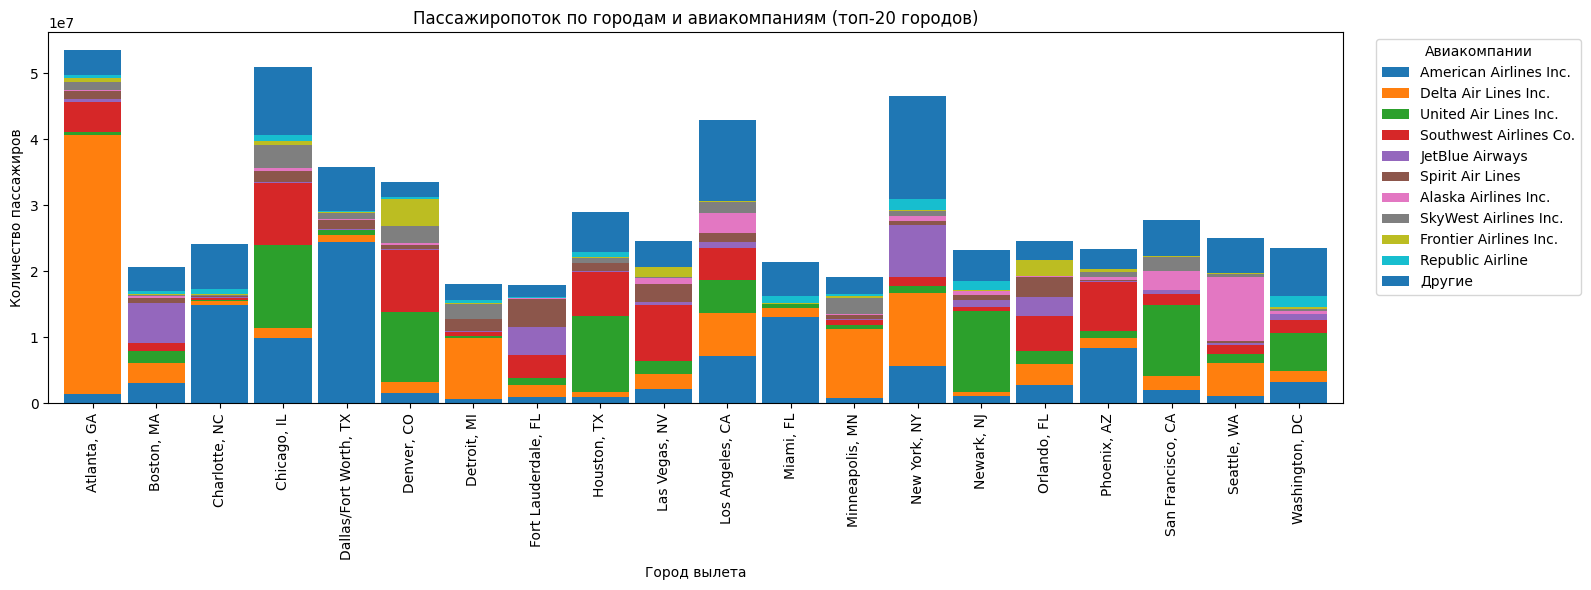

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

need_cols = {'origin_city_name', 'unique_carrier_name', 'passengers'}
if need_cols.issubset(df.columns):
    # топ-20 городов по общему пассажиропотоку
    top_cities = (
        df.groupby('origin_city_name')['passengers']
          .sum()
          .nlargest(20)
          .index
    )
    sub = df[df['origin_city_name'].isin(top_cities)].copy()

    # приводим числа
    sub['passengers'] = pd.to_numeric(sub['passengers'], errors='coerce').fillna(0)

    # сгруппируем по (город, перевозчик)
    wide = (
        sub.groupby(['origin_city_name','unique_carrier_name'])['passengers']
           .sum()
           .unstack(fill_value=0)
    )

    # сузим легенду до топ-10 перевозчиков
    top_carriers = wide.sum(axis=0).nlargest(10).index
    wide_small = pd.concat(
        [wide[top_carriers], wide.drop(columns=top_carriers).sum(axis=1).rename('Другие')],
        axis=1
    )

    ax = wide_small.sort_index().plot(
        kind='bar',
        stacked=True,
        figsize=(16,6),
        width=0.9
    )
    ax.set_title('Пассажиропоток по городам и авиакомпаниям (топ-20 городов)')
    ax.set_xlabel('Город вылета')
    ax.set_ylabel('Количество пассажиров')
    ax.legend(title='Авиакомпании', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print('График 12.2 пропущен: нет колонок Air Carrier (origin_city_name, unique_carrier_name, passengers).')


import pandas as pd
import matplotlib.pyplot as plt
import mpld3

# Данные (пример из вашего df)
grouped = df.groupby(['origin_city_name', 'unique_carrier_name'])['passengers'].sum().unstack(fill_value=0)

# Строим график
ax = grouped.head(20).plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title("Пассажиропоток по городам и авиакомпаниям (топ-20 городов)")
plt.xlabel("Город вылета")
plt.ylabel("Количество пассажиров")

# Делаем интерактивную легенду
interactive_legend = mpld3.plugins.InteractiveLegendPlugin(ax.get_legend().legendHandles,
                                                          grouped.columns.tolist(),
                                                          alpha_unsel=0.2, alpha_over=1.5, start_visible=True)
mpld3.plugins.connect(plt.gcf(), interactive_legend)

mpld3.display()


